# 데이터셋 정보 시각화

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

## 1. Cognitive-Reframing Dataset

In [ ]:
df1 = pd.read_csv('d01_cognitive_reframing.csv')
df1 = df1.drop(columns=['situation'])
df1 = df1.rename(columns={'thinking_traps_addressed': 'distortion'})
df1 = df1[['thought', 'distortion', 'reframe']]
df1

,thought,distortion,reframe
0,Someone I trusted stole something valuable of ...,emotional reasoning,"My roommate stole something of mine, and I wil..."
1,Someone I trusted stole something valuable of ...,emotional reasoning,While I would like there to be consequences fo...
2,She doesn't respect me.,overgeneralizing,She is older and may have been tired
3,She doesn't respect me.,overgeneralizing,"I felt disrespected by her actions, but that d..."
4,My friend is ignoring his recently-deceased wife.,disqualifying the positive,Maybe my friend is in a healthy spot to date n...
...,...,...,...
595,ill never be able to find a good job,"fortune telling,catastrophizing",This job may not have worked out but I got int...
596,I am being disrespected,"labeling,disqualifying the positive,negative f...",My neighbors were loud and I had a difficult d...
597,I am being disrespected,"labeling,disqualifying the positive,negative f...",My neighbors did not realize the volume of the...
598,maybe she doesn't like me anymore.,mind reading,My friend is probably feeling pretty low after...


인지왜곡 라벨 빈도 분석을 두 가지 방식으로 수행:

1a. **병합 전(before merging)**: 각 행(row)을 독립적으로 계산 (중복된 thought 포함) → 원시 라벨링 빈도를 반영하지만, 동일한 thought의 중복 또는 불일치가 포함될 수 있음.

1b. **병합 후(after merging)**: 연속된 동일 thought를 하나로 병합하고, 라벨을 합집합(set union) 형태로 통합함. → 각 thought 기준으로 중복 제거된 고유한 인지왜곡 분포를 반영함.

### 1a. 병합 전 (Before Merging)

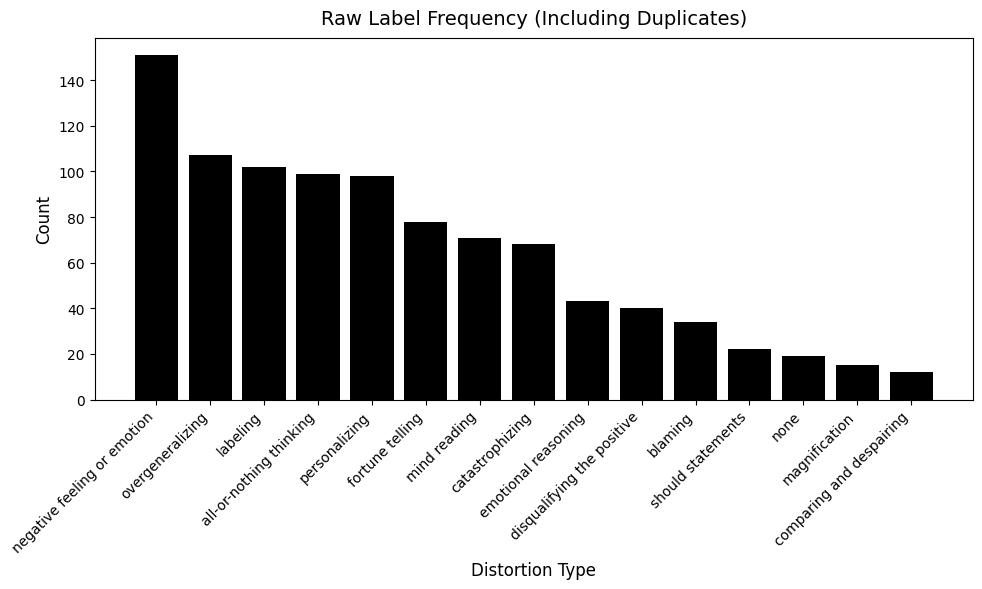

In [ ]:
# 중복 제거 X

# distortion 열의 멀티 라벨 분리
all_labels = df1['distortion'].dropna().apply(lambda x: [label.strip() for label in x.split(',')])

# 전체 레이블 카운트
label_counts = Counter([label for sublist in all_labels for label in sublist])

# 결과 정렬 및 출력
label_df = pd.DataFrame(label_counts.items(), columns=['distortion', 'count']).sort_values(by='count', ascending=False)
df1_labels = label_df

plt.figure(figsize=(10,6))
plt.bar(label_df['distortion'], label_df['count'], color='black', edgecolor='none')
plt.xticks(rotation=45, ha='right')
plt.title('Raw Label Frequency (Including Duplicates)', fontsize=14, pad=10)
plt.xlabel('Distortion Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

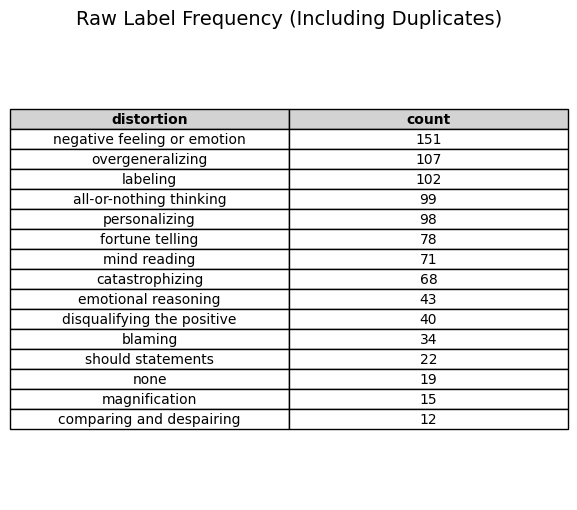

In [ ]:
fig, ax = plt.subplots(figsize=(6, len(label_df)*0.4))  # 데이터 개수에 따라 세로 길이 자동 조절
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=label_df.values,
    colLabels=label_df.columns,
    cellLoc='center',
    loc='center'
)
header_cells = table.get_celld()
for (row, col), cell in header_cells.items():
    if row == 0:
        cell.set_facecolor('lightgrey')
        cell.set_text_props(weight='bold', color='black')
        cell.set_edgecolor('black')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Raw Label Frequency (Including Duplicates)', fontsize=14, pad=10)
plt.show()

### 1b. 병합 후 (After Merging)

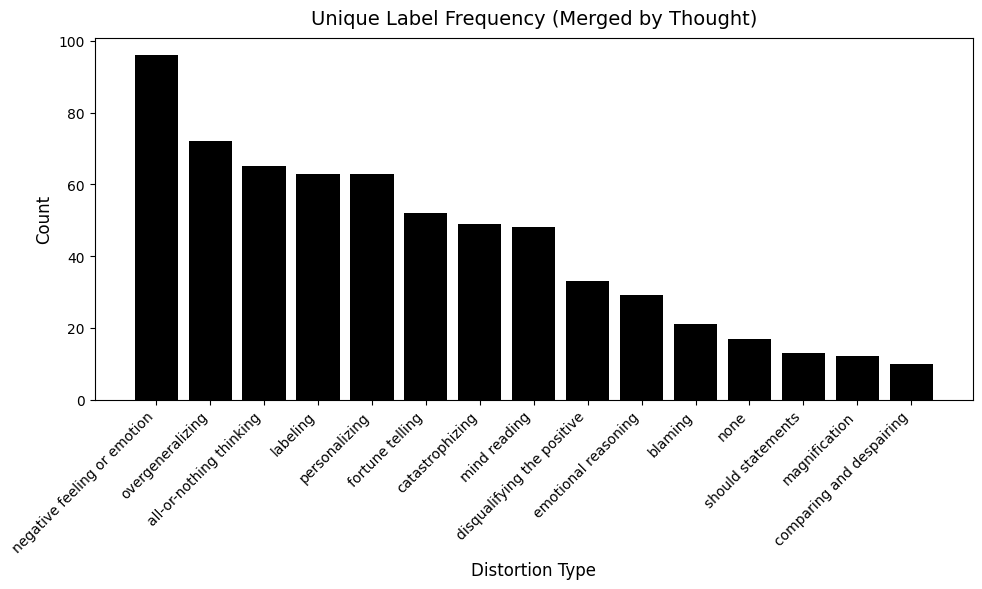

In [ ]:
# 같은 thought라면 label 합집합으로 병합

merged_rows = []
prev_thought, prev_labels = None, set()

for _, row in df1.iterrows():
    thought = str(row['thought']).strip()
    labels = {label.strip() for label in str(row['distortion']).split(',') if label.strip()}

    if thought == prev_thought:
        # 같은 thought라면 label 합집합으로 병합
        prev_labels = prev_labels.union(labels)
    else:
        # 새로운 thought가 시작되면 이전 것 저장
        if prev_thought is not None:
            merged_rows.append([prev_thought, ','.join(sorted(prev_labels))])
        prev_thought, prev_labels = thought, labels

# 마지막 thought 추가
if prev_thought is not None:
    merged_rows.append([prev_thought, ','.join(sorted(prev_labels))])

# 새 DataFrame 생성
df_merged = pd.DataFrame(merged_rows, columns=['thought', 'distortion'])
all_labels = [label.strip() for labels in df_merged['distortion'].dropna() for label in labels.split(',')]
label_counts = Counter(all_labels)
label_df = pd.DataFrame(label_counts.items(), columns=['distortion', 'count']).sort_values(by='count', ascending=False)
label_df

plt.figure(figsize=(10,6))
plt.bar(label_df['distortion'], label_df['count'], color='black', edgecolor='none')
plt.xticks(rotation=45, ha='right')
plt.title('Unique Label Frequency (Merged by Thought)', fontsize=14, pad=10)
plt.xlabel('Distortion Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

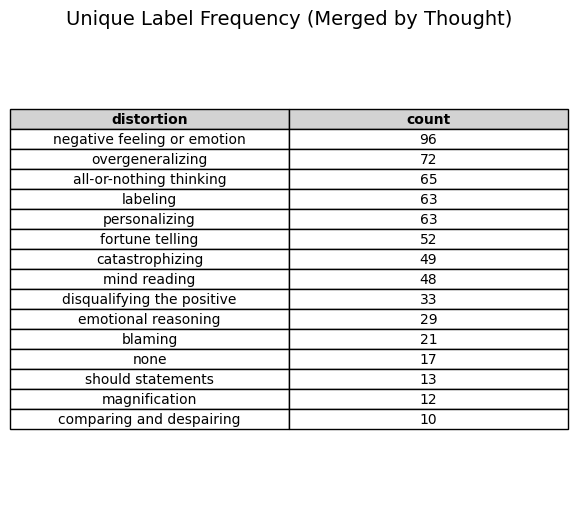

In [ ]:
fig, ax = plt.subplots(figsize=(6, len(label_df)*0.4))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=label_df.values,
    colLabels=label_df.columns,
    cellLoc='center',
    loc='center'
)
header_cells = table.get_celld()
for (row, col), cell in header_cells.items():
    if row == 0:
        cell.set_facecolor('lightgrey')
        cell.set_text_props(weight='bold', color='black')
        cell.set_edgecolor('black')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Unique Label Frequency (Merged by Thought)', fontsize=14, pad=10)
plt.show()

## 2. Cognitive Distortion Detection Dataset

In [ ]:
df2 = pd.read_csv('d02_cognitive_distortion_detection.csv')
df2 = df2.drop(columns=['Id_Number', 'Patient Question'])

# Secondary Distortion이 있는 경우 Dominant Distortion에 병합
df2['Dominant Distortion'] = df2.apply(
    lambda row: f"{row['Dominant Distortion']}, {row['Secondary Distortion (Optional)']}"
    if pd.notna(row['Secondary Distortion (Optional)']) else row['Dominant Distortion'],
    axis=1
)

df2 = df2.drop(columns=['Secondary Distortion (Optional)'])
df2 = df2.rename(columns={'Dominant Distortion': 'distortion'})
df2 = df2.rename(columns={'Distorted part': 'thought'})

df2

,thought,distortion
0,The voice are always fimilar (someone she know...,Personalization
1,I feel trapped inside my disgusting self and l...,"Labeling, Emotional Reasoning"
2,NaN,No Distortion
3,NaN,No Distortion
4,I refused to go because I didn’t know if it wa...,"Fortune-telling, Emotional Reasoning"
...,...,...
2525,NaN,No Distortion
2526,Now I am at university my peers around me all ...,Overgeneralization
2527,He claims he’s severely depressed and has outb...,"Mental filter, Mind Reading"
2528,NaN,No Distortion


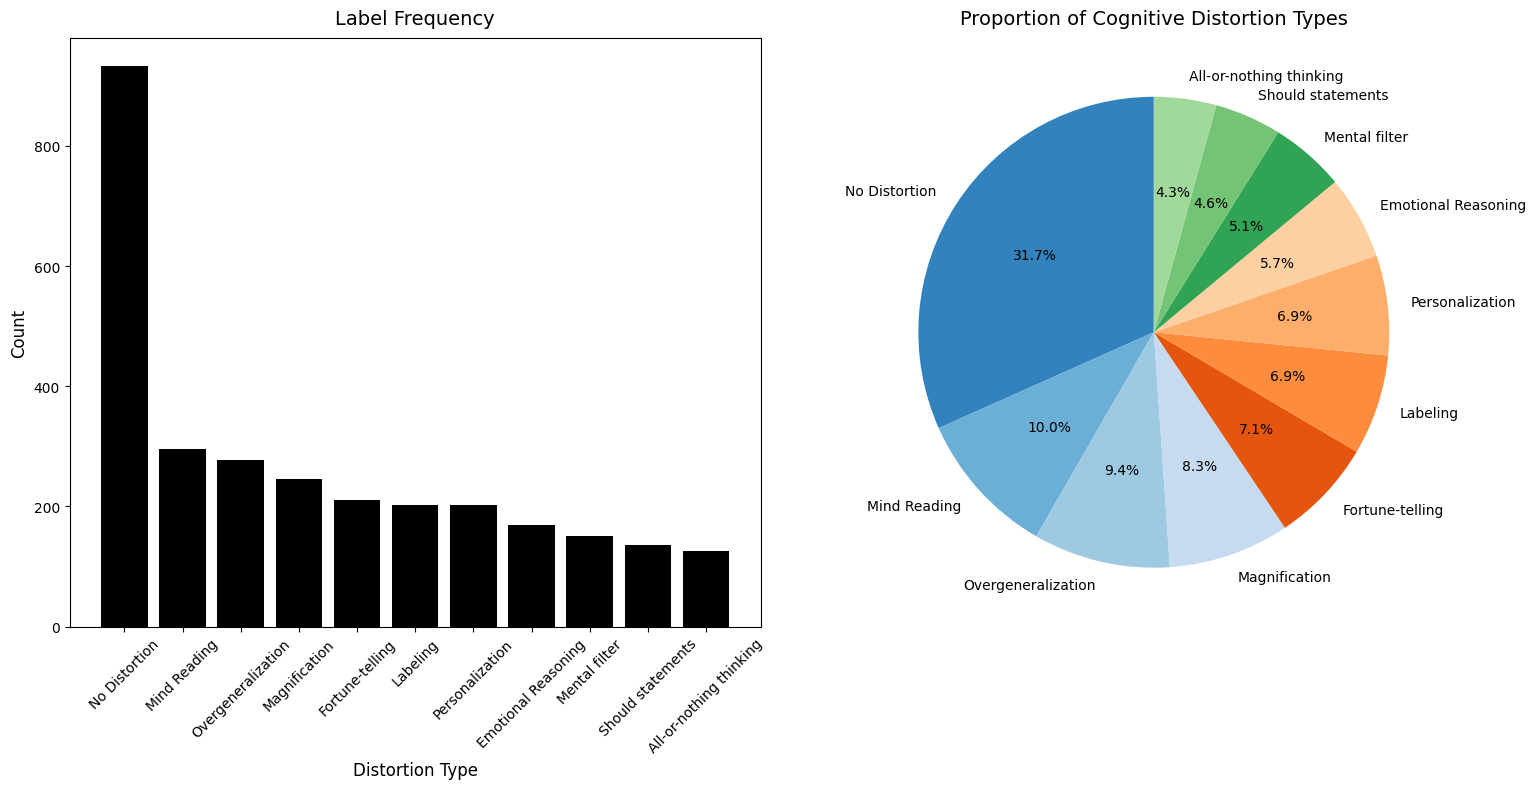

In [ ]:
all_labels = df2['distortion'].dropna().apply(lambda x: [label.strip() for label in x.split(',')])

label_counts = Counter([label for sublist in all_labels for label in sublist])

label_df = pd.DataFrame(label_counts.items(), columns=['distortion', 'count']).sort_values(by='count', ascending=False)
df2_labels = label_df
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].bar(label_df['distortion'], label_df['count'], color='black', edgecolor='none')
axes[0].set_title('Label Frequency', fontsize=14, pad=10)
axes[0].set_xlabel('Distortion Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

colors = plt.cm.tab20c(range(len(label_df)))
axes[1].pie(
    label_df['count'],
    labels=label_df['distortion'],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10},
    colors=colors
)
axes[1].set_title('Proportion of Cognitive Distortion Types', fontsize=14, pad=10)

plt.tight_layout()
plt.show()

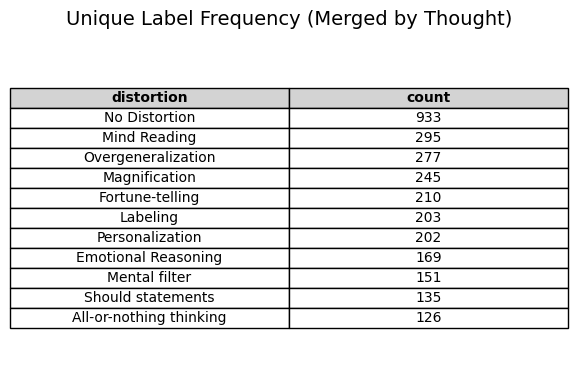

In [ ]:
fig, ax = plt.subplots(figsize=(6, len(label_df)*0.4))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=label_df.values,
    colLabels=label_df.columns,
    cellLoc='center',
    loc='center'
)
header_cells = table.get_celld()
for (row, col), cell in header_cells.items():
    if row == 0:
        cell.set_facecolor('lightgrey')
        cell.set_text_props(weight='bold', color='black')
        cell.set_edgecolor('black')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Unique Label Frequency (Merged by Thought)', fontsize=14, pad=10)
plt.show()

## 3. CBT Interaction

In [ ]:
df3 = pd.read_csv('d03_cbt_interaction.csv')
df3 = df3.drop(columns=['situation', 'domain', 'emotions', 'prefix', 'input_text'])
df3 = df3.rename(columns={'negative_thought': 'thought', 'distortions': 'distortion', 'target_text': 'reframe'})
df3 = df3.drop_duplicates(subset=['thought'], keep='first').reset_index(drop=True)
df3

,thought,distortion,reframe
0,He is angry with me.,"Jumping to Conclusions (Mind Reading),",He is probably very busy today and needs to co...
1,I'm not a good wife.,"Labeling, Mental Filter,",If no altercations have occurred I can assume ...
2,They made a terrible mistake when they chose m...,"All-or-Nothing Thinking, Jumping to Conclusion...",The editor immediately smiled at me and put me...
3,"I’ll never be able to make the book fresh, liv...","Disqualifying the Positive, Magnification,",All my friends and family gave me a good feedb...
4,I’m getting jilted. What did I do to foul thin...,"Jumping to Conclusions (Mind Reading), Persona...",I am obviously disappointed as I was excited t...
...,...,...,...
195,I feel like everybody is looking at me in the ...,"Jumping to Conclusions (Mind Reading), Emotion...","Don't be silly. They aren't looking at you, an..."
196,"I miss her, but I don't feel like I've mourned...","Emotional Reasoning, Should Statements, Person...","Your mum would have wanted you to be happy, no..."
197,I'm sure my friends and family are thinking th...,"Jumping to Conclusions (Mind Reading),","If they are your true friends, then they will ..."
198,I honestly can't take it anymore. There's alwa...,"Overgeneralization, Magnification, Labeling,",There is solutions out there to help situation...


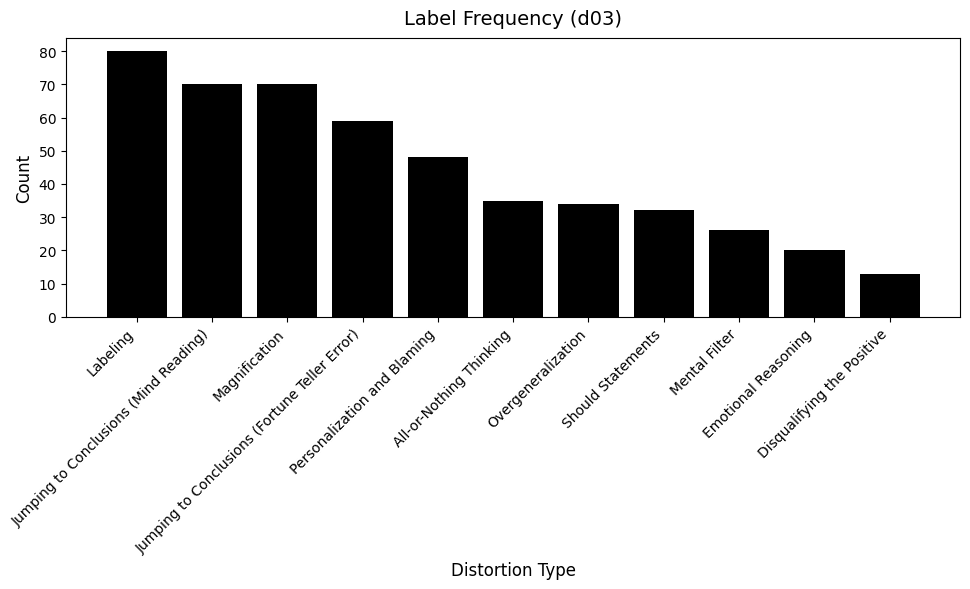

In [ ]:
from collections import Counter
import re

# distortion 컬럼의 멀티라벨 분리 (깨끗한 데이터 기준)
all_labels = df3['distortion'].apply(
    lambda x: [label.strip() for label in re.split(r',\s*', str(x).strip()) if label.strip()]
)

# 전체 레이블 카운트
label_counts = Counter([label for sublist in all_labels for label in sublist])

# 결과 정렬 및 DataFrame 변환
label_df = pd.DataFrame(label_counts.items(), columns=['distortion', 'count']).sort_values(by='count', ascending=False)
df3_labels = label_df
# 시각화
plt.figure(figsize=(10,6))
plt.bar(label_df['distortion'], label_df['count'], color='black', edgecolor='none')
plt.xticks(rotation=45, ha='right')
plt.title('Label Frequency (d03)', fontsize=14, pad=10)
plt.xlabel('Distortion Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

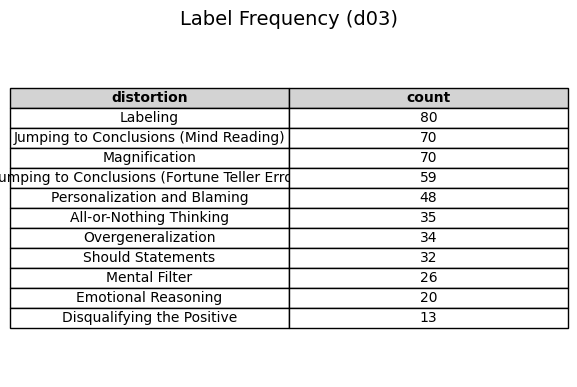

In [ ]:
fig, ax = plt.subplots(figsize=(6, len(label_df)*0.4))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=label_df.values,
    colLabels=label_df.columns,
    cellLoc='center',
    loc='center'
)
header_cells = table.get_celld()
for (row, col), cell in header_cells.items():
    if row == 0:
        cell.set_facecolor('lightgrey')
        cell.set_text_props(weight='bold', color='black')
        cell.set_edgecolor('black')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Label Frequency (d03)', fontsize=14, pad=10)
plt.show()

## 4. Cactus

In [ ]:
df4 = pd.read_json("hf://datasets/LangAGI-Lab/cactus/cactus.json")
df4

,thought,patterns,intake_form,cbt_technique,cbt_plan,attitude,dialogue
0,I frequent this animal shelter. All of the ani...,"[catastrophizing, discounting the positive, la...",Name:\nBrooke Davis\nAge:\n41\nGender:\nfemale...,Decatastrophizing,Decatastrophizing\n\nCounseling plan:\n1. Iden...,negative,"Counselor: Good afternoon, Brooke. Thank you f..."
1,I frequent this animal shelter. All of the ani...,"[catastrophizing, discounting the positive, la...",Name:\nBrooke Davis\nAge:\n41\nGender:\nfemale...,Reality Testing,Reality Testing\n\nCounseling Plan:\n1. Identi...,neutral,"Counselor: Hello, Brooke. I'm glad you made it..."
2,I frequent this animal shelter. All of the ani...,"[catastrophizing, discounting the positive, la...",Name:\nBrooke Davis\nAge:\n41\nGender:\nfemale...,Reality Testing,Reality Testing\n\nCounseling Plan:\n1. Identi...,negative,"Counselor: Hello Brooke, I’m glad you could jo..."
3,I'm really into my crystals. People will proba...,"[labeling and mislabeling, jumping to conclusi...",Name:\nJonathan Emmett\nAge:\n37\nGender:\nmal...,Alternative Perspective,Alternative Perspective\n\nCounseling Plan:\n1...,positive,"Counselor: Hello, Jonathan. It’s nice to meet ..."
4,I'm really into my crystals. People will proba...,"[labeling and mislabeling, jumping to conclusi...",Name:\nJonathan Emmett\nAge:\n37\nGender:\nmal...,Alternative Perspective,Alternative Perspective\n\nCounseling Plan:\n1...,neutral,"Counselor: Hi Jonathan, I'm glad you could mak..."
...,...,...,...,...,...,...,...
31572,I'll probably end up dying alone because I hav...,"[catastrophizing, discounting the positive, me...",Name:\nNathan Miller\nAge:\n36\nGender:\nmale\...,Alternative Perspective,Alternative Perspective\n\nCounseling Plan:\n1...,positive,"Counselor: Hi, Nathan. I'm glad you could make..."
31573,I'll probably end up dying alone because I hav...,"[catastrophizing, discounting the positive, me...",Name:\nNathan Miller\nAge:\n36\nGender:\nmale\...,Alternative Perspective,Alternative Perspective\n\nCounseling Plan:\n1...,neutral,"Counselor: Hello Nathan, it's nice to meet you..."
31574,I'll probably end up dying alone because I hav...,"[catastrophizing, discounting the positive, me...",Name:\nNathan Miller\nAge:\n36\nGender:\nmale\...,Behavior Experiment,Behavior Experiment\n\nCounseling Plan:\n1. Id...,positive,"Counselor: Hi Nathan, it's nice to meet you. H..."
31575,I'll probably end up dying alone because I hav...,"[catastrophizing, discounting the positive, me...",Name:\nNathan Miller\nAge:\n36\nGender:\nmale\...,Behavior Experiment,Behavior Experiment\n\nCounseling Plan:\n1. Id...,negative,"Counselor: Hi Nathan, I'm glad you're here. Ho..."


In [ ]:
# 중복 thought 제거함

df4 = df4.rename(columns={'patterns': 'distortion'})
df4 = df4[['thought', 'distortion']]
df4 = df4.drop_duplicates(subset=['thought'], keep='first').reset_index(drop=True)
df4

,thought,distortion
0,I frequent this animal shelter. All of the ani...,"[catastrophizing, discounting the positive, la..."
1,I'm really into my crystals. People will proba...,"[labeling and mislabeling, jumping to conclusi..."
2,"I have 8 brothers and while we are close, we d...","[catastrophizing, discounting the positive, ju..."
3,Everyone in the world probably thinks I'm a lo...,"[catastrophizing, jumping to conclusions: mind..."
4,"If I don’t find some friends, my life will be ...","[catastrophizing, mental filtering, overgenera..."
...,...,...
4051,My weekends are filled with bird watching but ...,"[discounting the positive, mental filtering, n..."
4052,I got rejected by the first loan officer I met...,"[catastrophizing, mental filtering, jumping to..."
4053,"My job is great, but I hate it, I dread going ...","[discounting the positive, mental filtering, b..."
4054,I don't get a long with my family. I'll never ...,"[catastrophizing, mental filtering, jumping to..."


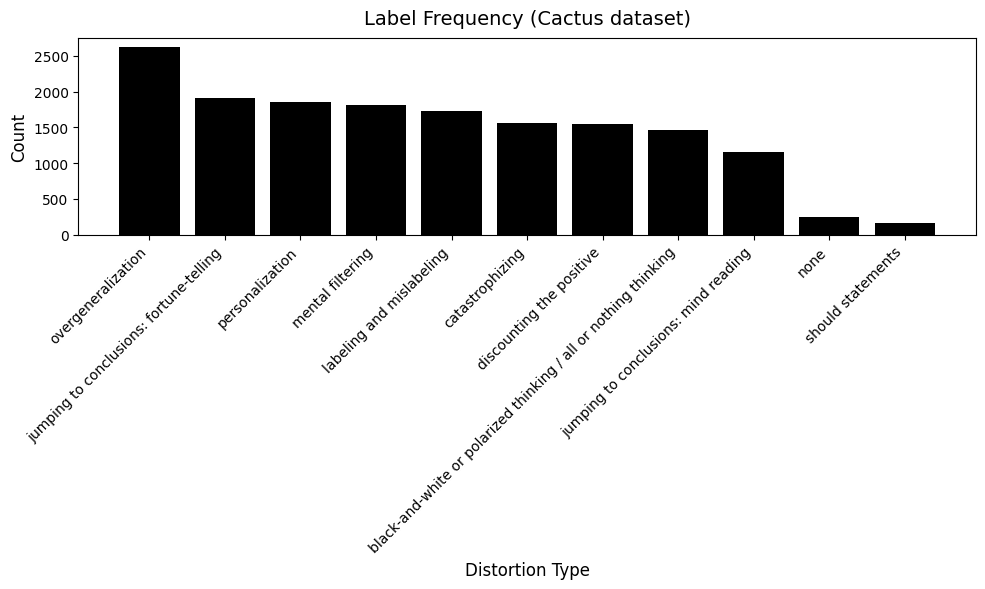

In [ ]:
all_labels = [label for sublist in df4['distortion'] for label in sublist if label]
label_counts = Counter(all_labels)
label_df = (
    pd.DataFrame(label_counts.items(), columns=['distortion', 'count'])
    .sort_values(by='count', ascending=False)
    .reset_index(drop=True)
)
df4_labels = label_df
plt.figure(figsize=(10,6))
plt.bar(label_df['distortion'], label_df['count'], color='black', edgecolor='none')
plt.xticks(rotation=45, ha='right')
plt.title('Label Frequency (Cactus dataset)', fontsize=14, pad=10)
plt.xlabel('Distortion Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

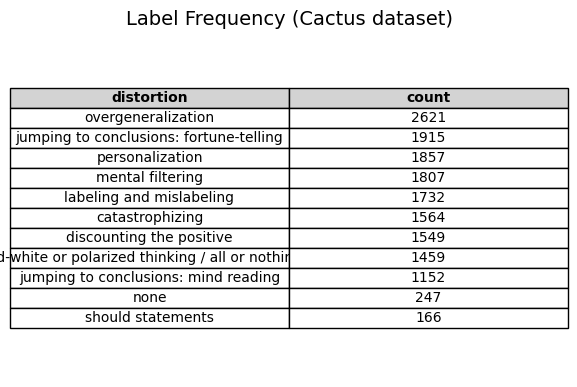

In [ ]:
fig, ax = plt.subplots(figsize=(6, len(label_df)*0.4))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=label_df.values,
    colLabels=label_df.columns,
    cellLoc='center',
    loc='center'
)
header_cells = table.get_celld()
for (row, col), cell in header_cells.items():
    if row == 0:
        cell.set_facecolor('lightgrey')
        cell.set_text_props(weight='bold', color='black')
        cell.set_edgecolor('black')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Label Frequency (Cactus dataset)', fontsize=14, pad=10)
plt.show()

## KoACD: Korean Adolescent Cognitive Distortion Dataset

In [ ]:
df5_1 = pd.read_excel('d07_KoACD_Cognitive_Clarification_Gpt.xlsx')
df5_2 = pd.read_excel('d07_KoACD_Cognitive_Balancing_Gpt.xlsx')

df5_1 = df5_1.rename(columns={'Cognitive Distortion (English)': 'distortion'})
df5_1 = df5_1.rename(columns={'Generated Story': 'thought'})
df5_1 = df5_1[['thought', 'distortion']]

df5_2 = df5_2.rename(columns={'Cognitive Distortion (English)': 'distortion'})
df5_2 = df5_2.rename(columns={'Generated Story': 'thought'})
df5_2 = df5_2[['thought', 'distortion']]

df5 = pd.concat([df5_1, df5_2], axis=0, ignore_index=True)

df5

,thought,distortion
0,"[남자/16] \n--- \n학교에 가고 싶지 않아, 친구들에게 말할 용기가 없...",Emotional Reasoning
1,[여자/15] \n--- \n선생님이 집에서 숙제를 안 했다고 크게 혼내셨어요....,Overgeneralization
2,[여자/17] \n--- \n어제 친구들이 제 외모를 농담하더라고요. '너는 왜...,Overgeneralization
3,[여자/16세] \n--- \n오늘 점심시간에 친구와 다퉜어요. 제 말이 너무 ...,All-or-Nothing Thinking
4,[여자/15세] \n--- \n요즘 많은 일이 힘들어요. 친구들이 제가 무표정하...,Emotional Reasoning
...,...,...
36234,[여자/16] \n--- \n수업 중 친구가 약속을 잊은 것 같아 속상했어. 분...,Personalization
36235,"[여자/17세] \n--- \n선생님과 상담할 때, 날카로운 질문에 내 마음이 ...",Personalization
36236,[여자/16세] \n--- \n모두가 나를 싫어하는 것 같아. 교실에서 나를 피...,Personalization
36237,[여자/16] \n--- \n고등학교 진학을 고민하고 있어. 실업계로 가고 싶은...,Personalization


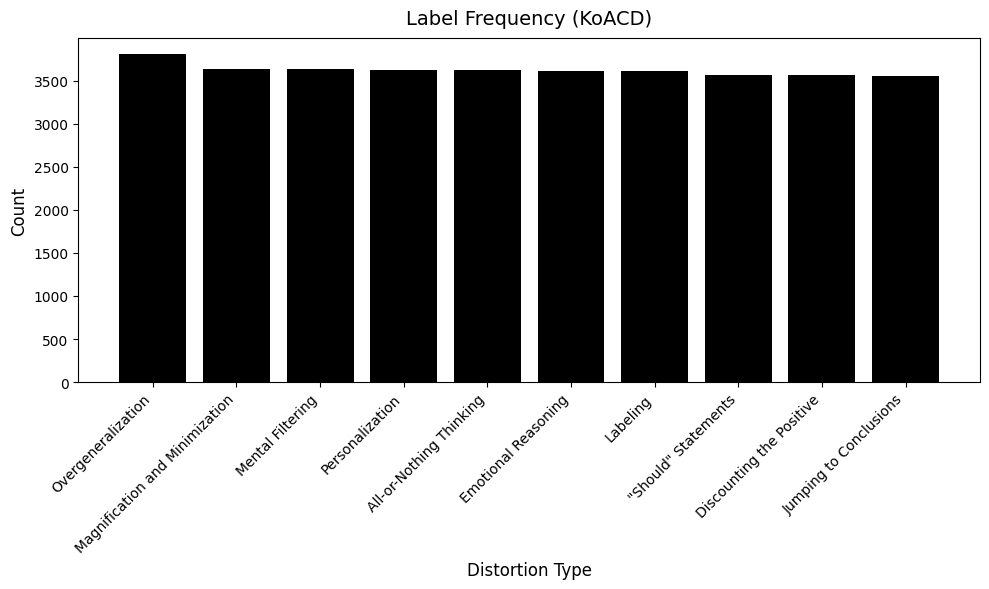

In [ ]:
label_counts = df5['distortion'].value_counts().sort_values(ascending=False)
label_df = (
    pd.DataFrame(label_counts.items(), columns=['distortion', 'count'])
    .sort_values(by='count', ascending=False)
    .reset_index(drop=True)
)
df5_labels = label_df
# ===== Bar Plot =====
plt.figure(figsize=(10,6))
plt.bar(label_df['distortion'], label_df['count'], color='black', edgecolor='none')
plt.xticks(rotation=45, ha='right')
plt.title('Label Frequency (KoACD)', fontsize=14, pad=10)
plt.xlabel('Distortion Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

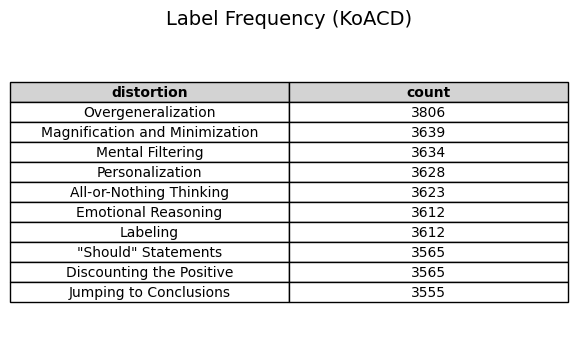

In [ ]:
fig, ax = plt.subplots(figsize=(6, len(label_df)*0.4))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=label_df.values,
    colLabels=label_df.columns,
    cellLoc='center',
    loc='center'
)
header_cells = table.get_celld()
for (row, col), cell in header_cells.items():
    if row == 0:
        cell.set_facecolor('lightgrey')
        cell.set_text_props(weight='bold', color='black')
        cell.set_edgecolor('black')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Label Frequency (KoACD)', fontsize=14, pad=10)
plt.show()

In [ ]:
df5_labels
df4_labels
label_df
df5_labels

,distortion,count
0,Overgeneralization,3806
1,Magnification and Minimization,3639
2,Mental Filtering,3634
3,Personalization,3628
4,All-or-Nothing Thinking,3623
5,Emotional Reasoning,3612
6,Labeling,3612
7,"""Should"" Statements",3565
8,Discounting the Positive,3565
9,Jumping to Conclusions,3555


In [ ]:
cols = [
    pd.Series(sorted(df1_labels['distortion'].unique()), name='d01_labels'),
    pd.Series(sorted(df2_labels['distortion'].unique()), name='d02_labels'),
    pd.Series(sorted(df3_labels['distortion'].unique()), name='d03_labels'),
    pd.Series(sorted(df4_labels['distortion'].unique()), name='d04_labels'),
    pd.Series(sorted(df5_labels['distortion'].unique()), name='d05_labels'),
]

# 길이가 다르기 때문에 열 방향으로 병합 시 자동 정렬 (NaN 채워짐)
labels_side_by_side = pd.concat(cols, axis=1)

# 보기 좋게 표시
labels_side_by_side

,d01_labels,d02_labels,d03_labels,d04_labels,d05_labels
0,all-or-nothing thinking,All-or-nothing thinking,All-or-Nothing Thinking,black-and-white or polarized thinking / all or...,"""Should"" Statements"
1,blaming,Emotional Reasoning,Disqualifying the Positive,catastrophizing,All-or-Nothing Thinking
2,catastrophizing,Fortune-telling,Emotional Reasoning,discounting the positive,Discounting the Positive
3,comparing and despairing,Labeling,Jumping to Conclusions (Fortune Teller Error),jumping to conclusions: fortune-telling,Emotional Reasoning
4,disqualifying the positive,Magnification,Jumping to Conclusions (Mind Reading),jumping to conclusions: mind reading,Jumping to Conclusions
5,emotional reasoning,Mental filter,Labeling,labeling and mislabeling,Labeling
6,fortune telling,Mind Reading,Magnification,mental filtering,Magnification and Minimization
7,labeling,No Distortion,Mental Filter,none,Mental Filtering
8,magnification,Overgeneralization,Overgeneralization,overgeneralization,Overgeneralization
9,mind reading,Personalization,Personalization and Blaming,personalization,Personalization


In [ ]:
# 표준 라벨 리스트 (전부 소문자)
standard_labels = [
    'all-or-nothing thinking',
    'disqualifying the positive',
    'emotional reasoning',
    'jumping to conclusions',
    'labeling',
    'magnification',
    'overgeneralizing',
    'personalizing and blaming',
    'should statements',
    'mental filter',
    'catastrophizing',
    'comparing and despairing',
    'negative feeling or emotion',
    'no distortion'
]

# DataFrame 생성 및 count 0으로 초기화
total_labels = pd.DataFrame({
    'distortion': standard_labels,
    'count': [0] * len(standard_labels)
})

In [ ]:
total_labels.loc[
    total_labels['distortion'] == 'all-or-nothing thinking', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'all-or-nothing thinking', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'All-or-nothing thinking', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'All-or-Nothing Thinking', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'black-and-white or polarized thinking / all or nothing thinking', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == 'All-or-Nothing Thinking', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'disqualifying the positive', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'disqualifying the positive', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Disqualifying the Positive', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'discounting the positive', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == 'Discounting the Positive', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'emotional reasoning', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'emotional reasoning', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'Emotional Reasoning', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Emotional Reasoning', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == 'Emotional Reasoning', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'emotional reasoning', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'emotional reasoning', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'Emotional Reasoning', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Emotional Reasoning', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == 'Emotional Reasoning', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'jumping to conclusions', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'fortune telling', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'Fortune-telling', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Jumping to Conclusions (Fortune Teller Error)', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'jumping to conclusions: fortune-telling', 'count'].sum() +
    df1_labels.loc[df1_labels['distortion'] == 'mind reading', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'Mind Reading', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Jumping to Conclusions (Mind Reading)', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'jumping to conclusions: mind reading', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == 'Jumping to Conclusions', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'labeling', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'labeling', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'Labeling', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Labeling', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'labeling and mislabeling', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == 'Labeling', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'magnification', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'magnification', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'Magnification', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Magnification', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == 'Magnification and Minimization', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'overgeneralizing', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'overgeneralizing', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'Overgeneralization', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Overgeneralization', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'overgeneralization', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == 'Overgeneralization', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'personalizing and blaming', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'personalizing', 'count'].sum() +
    df1_labels.loc[df1_labels['distortion'] == 'blaming', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'Personalization', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Personalization and Blaming', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'personalization', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == 'Personalization', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'should statements', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'should statements', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'Should statements', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Should Statements', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'should statements', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == '"Should" Statements', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'labeling', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'labeling', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'Labeling', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Labeling', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'labeling and mislabeling', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == 'Labeling', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'mental filter', 'count'
] = (
    df2_labels.loc[df2_labels['distortion'] == 'Mental filter', 'count'].sum() +
    df3_labels.loc[df3_labels['distortion'] == 'Mental Filter', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'mental filtering', 'count'].sum() +
    df5_labels.loc[df5_labels['distortion'] == 'Mental Filtering', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'catastrophizing', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'catastrophizing', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'catastrophizing', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'comparing and despairing', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'comparing and despairing', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'negative feeling or emotion', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'negative feeling or emotion', 'count'].sum()
)
total_labels.loc[
    total_labels['distortion'] == 'no distortion', 'count'
] = (
    df1_labels.loc[df1_labels['distortion'] == 'none', 'count'].sum() +
    df2_labels.loc[df2_labels['distortion'] == 'No Distortion', 'count'].sum() +
    df4_labels.loc[df4_labels['distortion'] == 'none', 'count'].sum()

)
total_labels

,distortion,count
0,all-or-nothing thinking,5342
1,disqualifying the positive,5167
2,emotional reasoning,3844
3,jumping to conclusions,7405
4,labeling,5729
5,magnification,3969
6,overgeneralizing,6845
7,personalizing and blaming,5867
8,should statements,3920
9,mental filter,5618


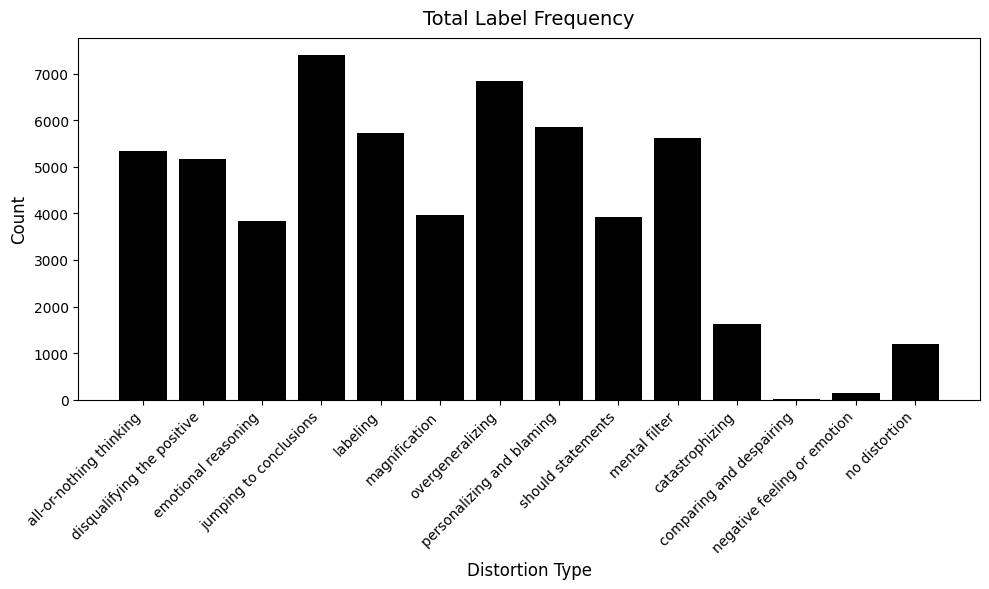

In [ ]:
# ===== Bar Plot =====
plt.figure(figsize=(10,6))
plt.bar(total_labels['distortion'], total_labels['count'], color='black', edgecolor='none')
plt.xticks(rotation=45, ha='right')
plt.title('Total Label Frequency', fontsize=14, pad=10)
plt.xlabel('Distortion Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

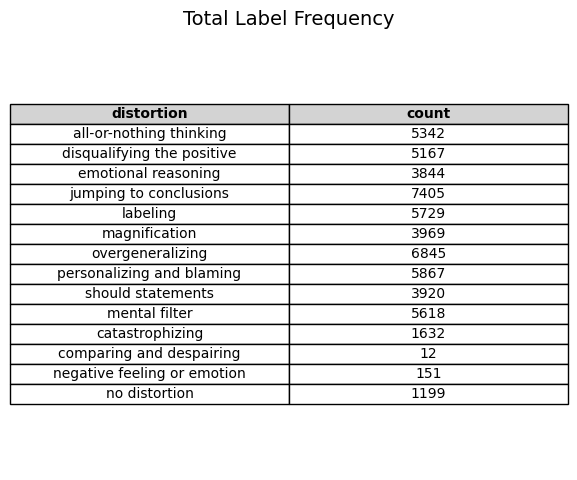

In [ ]:
fig, ax = plt.subplots(figsize=(6, len(total_labels)*0.4))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=total_labels.values,
    colLabels=total_labels.columns,
    cellLoc='center',
    loc='center'
)
header_cells = table.get_celld()
for (row, col), cell in header_cells.items():
    if row == 0:
        cell.set_facecolor('lightgrey')
        cell.set_text_props(weight='bold', color='black')
        cell.set_edgecolor('black')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Total Label Frequency', fontsize=14, pad=10)
plt.show()